In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data_path = "./../output/cls_time_series.csv"
df = pd.read_csv(data_path, index_col=0)

In [17]:
df

,name,date,null_px,snow_px,cloud_px,shadow_px,vegetation_px,not_vegetation_px,water_px,uncertain_px
0,northern_cairngorms,2022-03-21 11:43:49,0,494989,601,18426,449483,356993,4102,1
1,monadh_liath,2022-03-21 11:43:49,0,143702,370353,1030,249507,86596,529,0
2,southern_cairngorms,2022-03-21 11:43:49,0,174642,43,11021,449942,278842,6763,18
3,beinn_dearg,2022-03-21 11:43:49,0,46153,4,0,30999,26483,22,0
4,northern_cairngorms,2019-07-15 11:43:59,0,0,1033171,53679,141713,25824,186,70022
...,...,...,...,...,...,...,...,...,...,...
1115,beinn_dearg,2021-11-28 11:33:29,0,79648,24013,0,0,0,0,0
1116,northern_cairngorms,2018-09-22 11:21:09,1324595,0,0,0,0,0,0,0
1117,monadh_liath,2018-09-22 11:21:09,851717,0,0,0,0,0,0,0
1118,southern_cairngorms,2018-09-22 11:21:09,921271,0,0,0,0,0,0,0


In [19]:
# Calculate the percentage of 'null_px' values for each row
df['null_px_percentage'] = (df['null_px'] / df.drop(['name', 'date'], axis=1).sum(axis=1)) * 100

# Set a threshold for the percentage of 'null_px' values to consider as a majority
threshold = 50  # Adjust this threshold as needed

# Filter the DataFrame to keep rows where the 'null_px' percentage is below the threshold
df = df[df['null_px_percentage'] < threshold]

# Drop the 'null_px_percentage' column if you no longer need it
df = df.drop('null_px_percentage', axis=1)

# Now 'filtered_df' contains rows where 'null_px' is not the majority
df

/tmp/ipykernel_2447/386175046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['null_px_percentage'] = (df['null_px'] / df.drop(['name', 'date'], axis=1).sum(axis=1)) * 100


,name,date,null_px,snow_px,cloud_px,shadow_px,vegetation_px,not_vegetation_px,water_px,uncertain_px
0,northern_cairngorms,2022-03-21 11:43:49,0,494989,601,18426,449483,356993,4102,1
1,monadh_liath,2022-03-21 11:43:49,0,143702,370353,1030,249507,86596,529,0
2,southern_cairngorms,2022-03-21 11:43:49,0,174642,43,11021,449942,278842,6763,18
3,beinn_dearg,2022-03-21 11:43:49,0,46153,4,0,30999,26483,22,0
4,northern_cairngorms,2019-07-15 11:43:59,0,0,1033171,53679,141713,25824,186,70022
...,...,...,...,...,...,...,...,...,...,...
1111,beinn_dearg,2020-08-15 11:33:19,0,0,76828,722,14813,5972,0,5326
1112,northern_cairngorms,2021-11-28 11:33:29,0,701069,470096,56676,0,0,94145,2609
1113,monadh_liath,2021-11-28 11:33:29,0,517924,183747,27698,0,0,118315,4033
1114,southern_cairngorms,2021-11-28 11:33:29,0,451193,286815,48654,0,5,131345,3259


/tmp/ipykernel_2447/1360365325.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["date"] = pd.to_datetime(sub_df["date"])


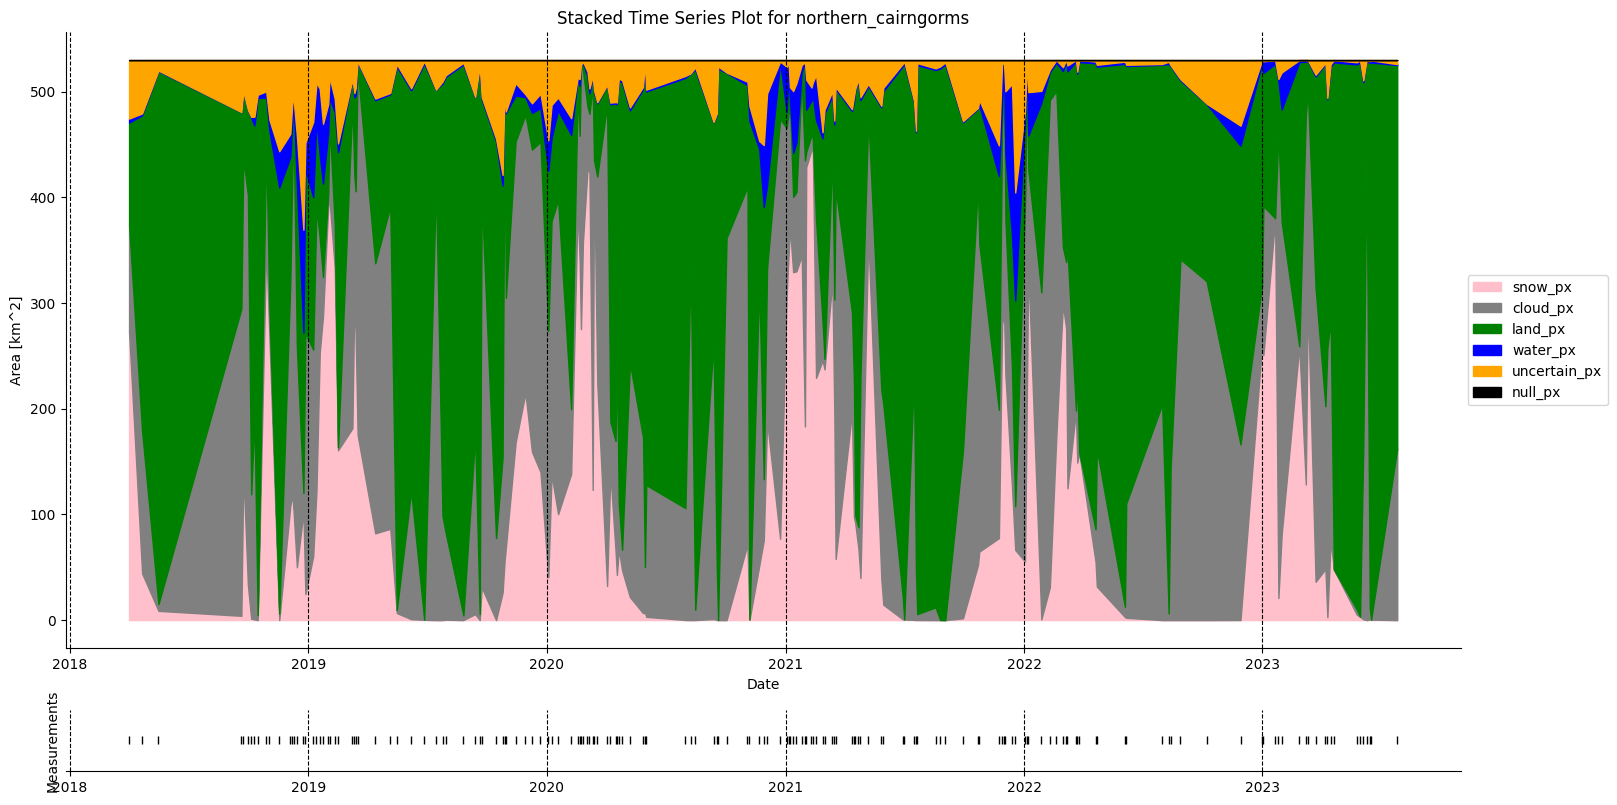

/tmp/ipykernel_2447/1360365325.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["date"] = pd.to_datetime(sub_df["date"])


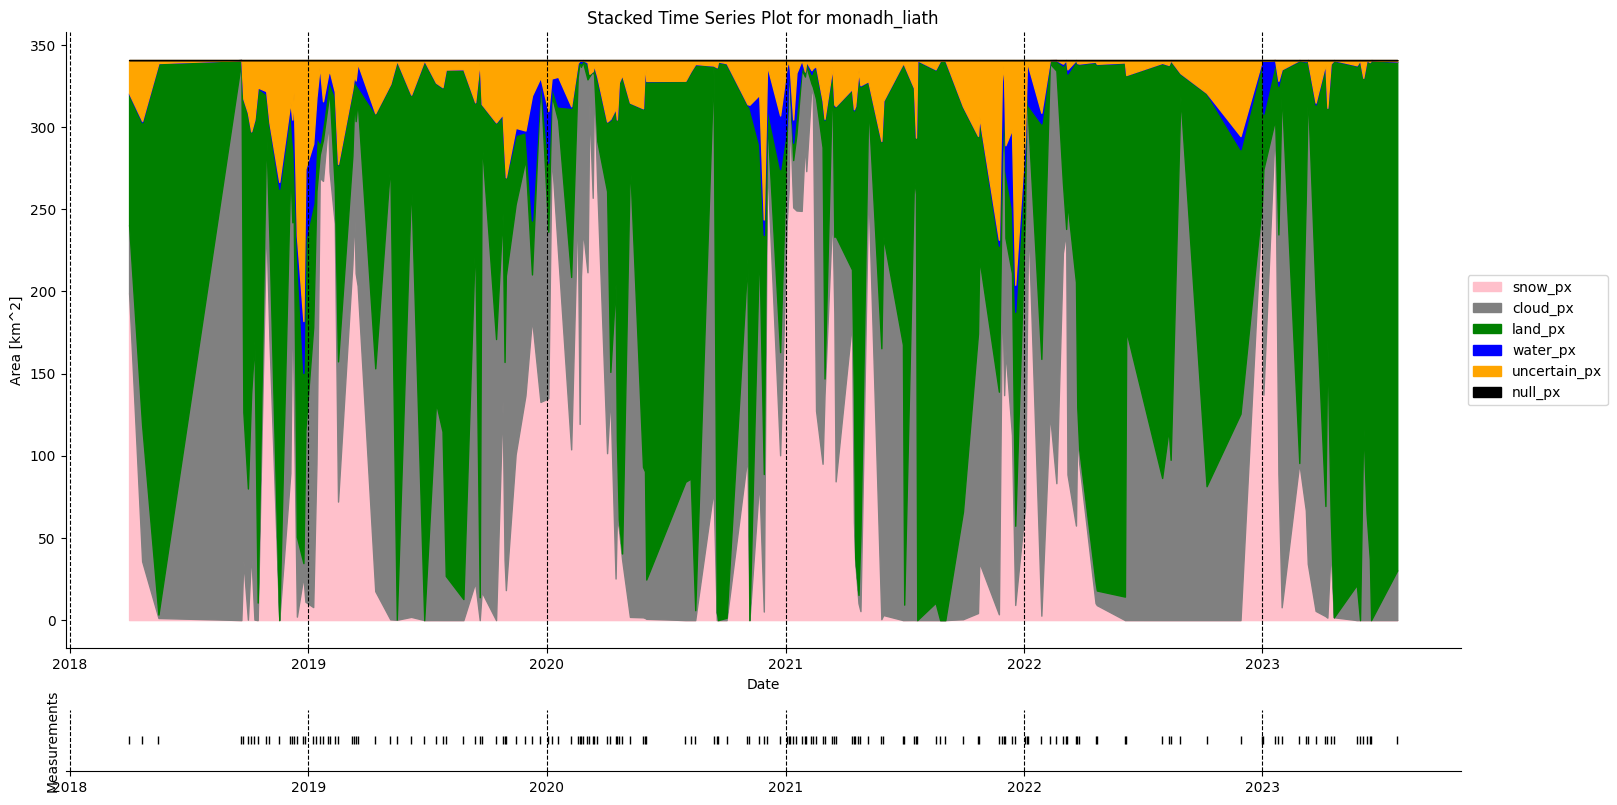

/tmp/ipykernel_2447/1360365325.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["date"] = pd.to_datetime(sub_df["date"])


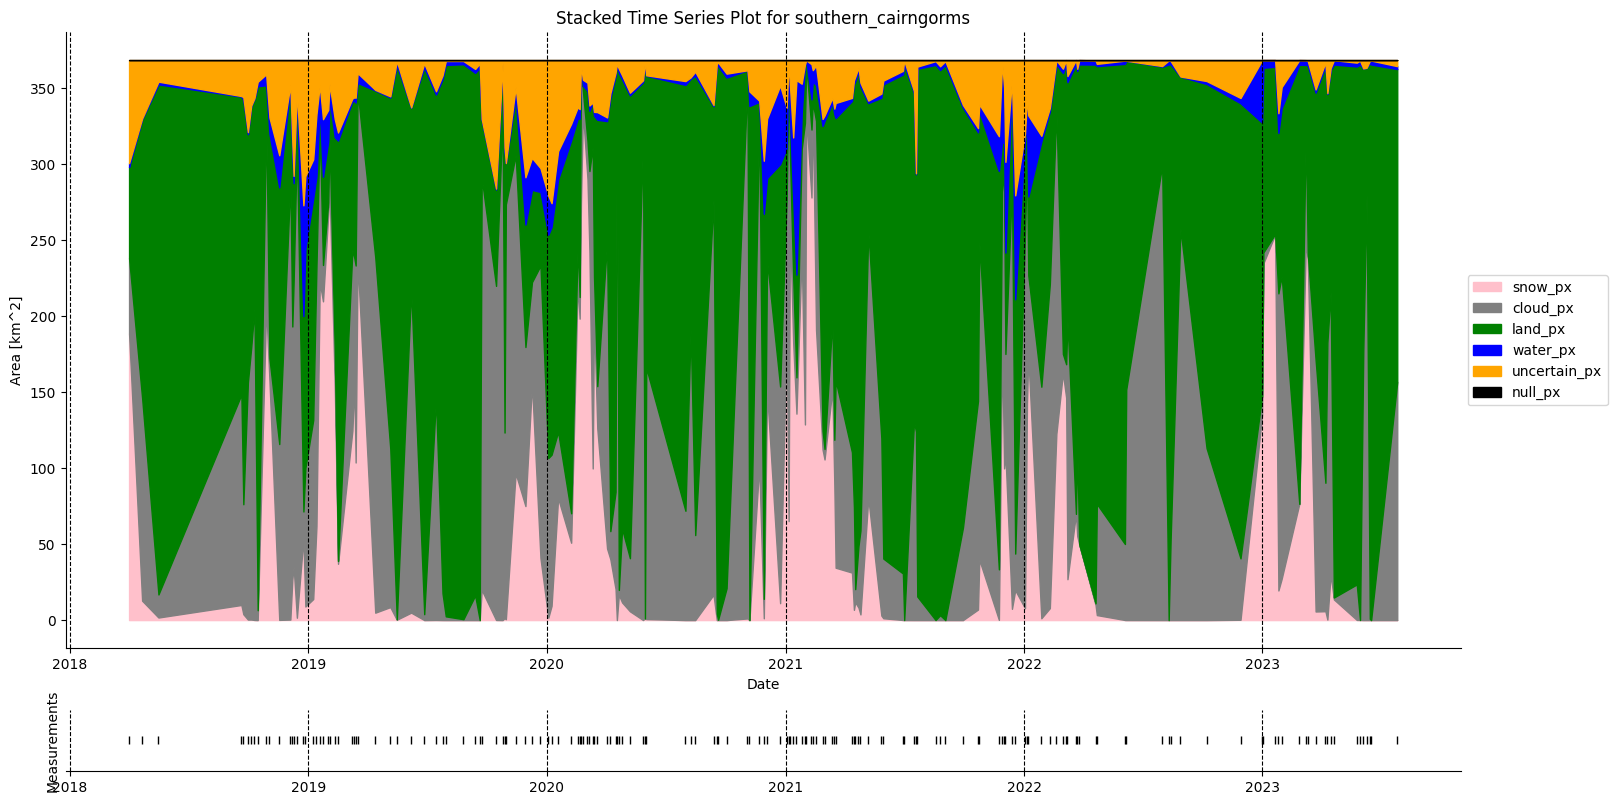

/tmp/ipykernel_2447/1360365325.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["date"] = pd.to_datetime(sub_df["date"])


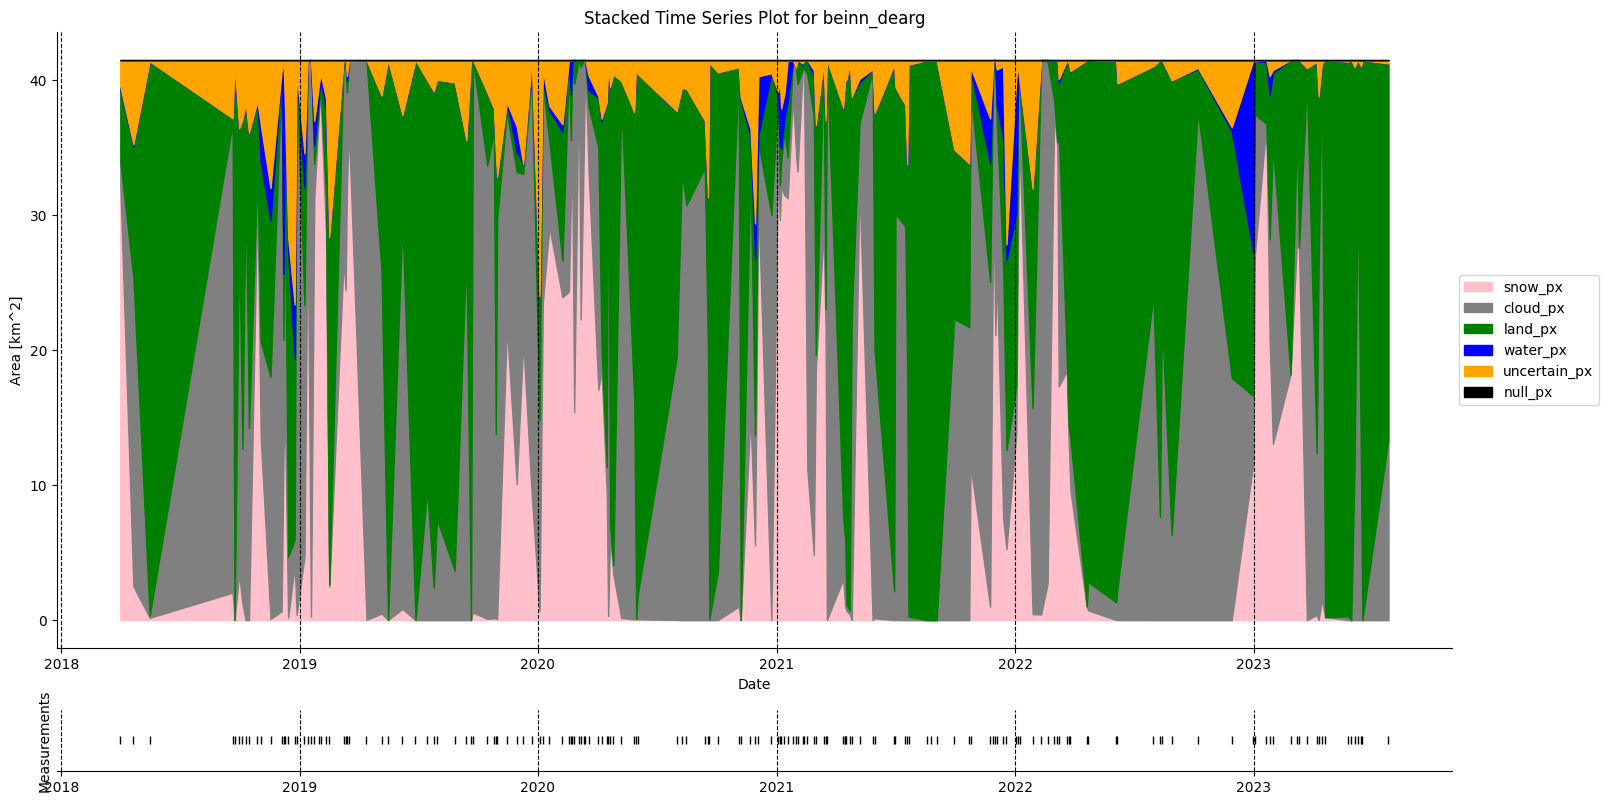

In [44]:
names = list(df["name"].unique())

# Define colors for each category
colors = {
    "land_px": "green",
    "snow_px": "pink",
    "cloud_px": "grey",
    "null_px": "black",
    "uncertain_px": "orange",
}

for name in names:
    sub_df = df[df["name"] == name]

     # Convert the "date" column to datetime if it's not already
    sub_df["date"] = pd.to_datetime(sub_df["date"])

    # Sort the DataFrame by date
    sub_df = sub_df.sort_values(by="date")

    # Merge a few columns
    sub_df["land_px"] = sub_df["vegetation_px"] + sub_df["not_vegetation_px"] + sub_df["shadow_px"]

    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(18, 8))

    # List of columns to plot (excluding "name" and "date" columns)
    columns_to_plot = ["snow_px", "cloud_px", "land_px", "water_px", "uncertain_px", "null_px"]

    # Convert to units of km^2 using 20m^2 pixel resolution
    sub_df[columns_to_plot] *= 400 * 1e-6

    # Initialize an array for cumulative sums
    cumulative_sum = 0

    # Plot each category with the specified color
    legend_labels = []  # To store legend labels for merged columns
    for column in columns_to_plot:
        ax.fill_between(
            sub_df["date"],
            cumulative_sum,
            cumulative_sum + sub_df[column],
            label=column,
            color=colors.get(column, "blue"),
        )
        cumulative_sum += sub_df[column]

    # Remove axis border
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)

    # Customize the plot
    ax.set_title(f"Stacked Time Series Plot for {name}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Area [km^2]")
    
    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

    ax.grid(axis='x', linestyle='--', alpha=1.0, color="black")


    # Create a second subplot below the main plot, sharing the same x-axis
    ax2 = ax.inset_axes([0, -0.2, 1, 0.1])

    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    #ax2.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    # Add markers for every time point where the data is measured
    ax2.plot(sub_df["date"], [1] * len(sub_df), '|', color='black', markersize=6, markeredgewidth=1)

    # Hide the y-axis labels and ticks for the second subplot
    ax2.set_yticklabels([])
    ax2.set_yticks([])
    ax2.set_ylabel("Measurements")
    ax2.grid(axis='x', linestyle='--', alpha=1.0, color="black")

    # Adjust spacing between the two subplots
    fig.subplots_adjust(hspace=0.05)
    
    # Display or save the plot
    plt.show()
    fig.savefig(f"timeseries_{name}.png")
    plt.close()

    